In [32]:
import numpy as np
import pandas as pd
from pandas import DataFrame
from pandas import Series
import matplotlib.pyplot as plt

In [2]:
NEIC = pd.read_csv('earthquake.csv',sep = ',')
NEIC.shape

(23412, 21)

In [3]:
NEIC.head()

,Date,Time,Latitude,Longitude,Type,Depth,Depth Error,Depth Seismic Stations,Magnitude,Magnitude Type,...,Magnitude Seismic Stations,Azimuthal Gap,Horizontal Distance,Horizontal Error,Root Mean Square,ID,Source,Location Source,Magnitude Source,Status
0,01/02/1965,13:44:18,19.246,145.616,Earthquake,131.6,NaN,NaN,6.0,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860706,ISCGEM,ISCGEM,ISCGEM,Automatic
1,01/04/1965,11:29:49,1.863,127.352,Earthquake,80.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860737,ISCGEM,ISCGEM,ISCGEM,Automatic
2,01/05/1965,18:05:58,-20.579,-173.972,Earthquake,20.0,NaN,NaN,6.2,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860762,ISCGEM,ISCGEM,ISCGEM,Automatic
3,01/08/1965,18:49:43,-59.076,-23.557,Earthquake,15.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860856,ISCGEM,ISCGEM,ISCGEM,Automatic
4,01/09/1965,13:32:50,11.938,126.427,Earthquake,15.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860890,ISCGEM,ISCGEM,ISCGEM,Automatic


In [4]:
NEIC.describe()

,Latitude,Longitude,Depth,Depth Error,Depth Seismic Stations,Magnitude,Magnitude Error,Magnitude Seismic Stations,Azimuthal Gap,Horizontal Distance,Horizontal Error,Root Mean Square
count,23412.000000,23412.000000,23412.000000,4461.000000,7097.000000,23412.000000,327.000000,2564.000000,7299.000000,1604.000000,1156.000000,17352.000000
mean,1.679033,39.639961,70.767911,4.993115,275.364098,5.882531,0.071820,48.944618,44.163532,3.992660,7.662759,1.022784
std,30.113183,125.511959,122.651898,4.875184,162.141631,0.423066,0.051466,62.943106,32.141486,5.377262,10.430396,0.188545
min,-77.080000,-179.997000,-1.100000,0.000000,0.000000,5.500000,0.000000,0.000000,0.000000,0.004505,0.085000,0.000000
25%,-18.653000,-76.349750,14.522500,1.800000,146.000000,5.600000,0.046000,10.000000,24.100000,0.968750,5.300000,0.900000
50%,-3.568500,103.982000,33.000000,3.500000,255.000000,5.700000,0.059000,28.000000,36.000000,2.319500,6.700000,1.000000
75%,26.190750,145.026250,54.000000,6.300000,384.000000,6.000000,0.075500,66.000000,54.000000,4.724500,8.100000,1.130000
max,86.005000,179.998000,700.000000,91.295000,934.000000,9.100000,0.410000,821.000000,360.000000,37.874000,99.000000,3.440000


In [5]:
NEIC = NEIC.drop(['Depth Error','Depth Seismic Stations','Magnitude Error','Magnitude Seismic Stations','Azimuthal Gap','Horizontal Distance','Horizontal Error','Root Mean Square'],1)

In [6]:
NEIC.head()

,Date,Time,Latitude,Longitude,Type,Depth,Magnitude,Magnitude Type,ID,Source,Location Source,Magnitude Source,Status
0,01/02/1965,13:44:18,19.246,145.616,Earthquake,131.6,6.0,MW,ISCGEM860706,ISCGEM,ISCGEM,ISCGEM,Automatic
1,01/04/1965,11:29:49,1.863,127.352,Earthquake,80.0,5.8,MW,ISCGEM860737,ISCGEM,ISCGEM,ISCGEM,Automatic
2,01/05/1965,18:05:58,-20.579,-173.972,Earthquake,20.0,6.2,MW,ISCGEM860762,ISCGEM,ISCGEM,ISCGEM,Automatic
3,01/08/1965,18:49:43,-59.076,-23.557,Earthquake,15.0,5.8,MW,ISCGEM860856,ISCGEM,ISCGEM,ISCGEM,Automatic
4,01/09/1965,13:32:50,11.938,126.427,Earthquake,15.0,5.8,MW,ISCGEM860890,ISCGEM,ISCGEM,ISCGEM,Automatic


In [10]:
print np.unique(NEIC.Type)

['Earthquake' 'Explosion' 'Nuclear Explosion' 'Rock Burst']


In [11]:
print NEIC['Magnitude Type'].unique()

['MW' 'ML' 'MH' 'MS' 'MB' 'MWC' 'MD' nan 'MWB' 'MWW' 'MWR']


In [13]:
print NEIC['Type'].unique()

['Earthquake' 'Nuclear Explosion' 'Explosion' 'Rock Burst']


In [15]:
minimum=NEIC["Magnitude"].min()
maximum=NEIC["Magnitude"].max()
average=NEIC["Magnitude"].mean()

print "Minimum: " ,minimum
print "Maximum: " ,maximum
print "Average: " ,average

Minimum:  5.5
Maximum:  9.1
Average:  5.88253075346


In [18]:
highly_effected=NEIC[NEIC["Magnitude"]>=8]
print highly_effected 

             Date      Time  Latitude  Longitude        Type   Depth  \
11     01/24/1965  00:11:17   -2.6080   125.9520  Earthquake   20.00   
16     02/04/1965  05:01:22   51.2510   178.7150  Earthquake   30.30   
538    10/17/1966  21:42:00  -10.6650   -78.2280  Earthquake   40.00   
911    05/16/1968  00:49:02   40.8600   143.4350  Earthquake   29.90   
1663   07/31/1970  17:08:05   -1.5970   -72.5320  Earthquake  644.80   
1983   07/14/1971  06:11:30   -5.5240   153.8500  Earthquake   40.00   
2008   07/26/1971  01:23:22   -4.8170   153.1720  Earthquake   40.00   
2530   12/02/1972  00:19:52    6.4050   126.6400  Earthquake   60.00   
3770   01/14/1976  16:47:34  -28.4270  -177.6570  Earthquake   33.00   
7415   03/03/1985  22:47:07  -33.1350   -71.8710  Earthquake   33.00   
7699   09/19/1985  13:17:47   18.1900  -102.5330  Earthquake   27.90   
7959   05/07/1986  22:47:11   51.5200  -174.7760  Earthquake   33.00   
9484   05/23/1989  10:54:46  -52.3410   160.5680  Earthquake   1

In [19]:
def f(x):
    return Series(dict(Number_of_earthquakes = x['ID'].count(),
                       Intensity = x['Magnitude'].mean()
                       ))
f(NEIC)

Intensity                    5.882531
Number_of_earthquakes    23412.000000
dtype: float64

In [20]:
Earthquake_by_type = NEIC.groupby('Type').apply(f)
Earthquake_by_type

,Intensity,Number_of_earthquakes
Type,,
Earthquake,5.882763,23232.0
Explosion,5.850000,4.0
Nuclear Explosion,5.850686,175.0
Rock Burst,6.200000,1.0


In [21]:
import datetime as dt

In [22]:
NEIC.dtypes

Date                 object
Time                 object
Latitude            float64
Longitude           float64
Type                 object
Depth               float64
Magnitude           float64
Magnitude Type       object
ID                   object
Source               object
Location Source      object
Magnitude Source     object
Status               object
dtype: object

In [23]:
NEIC['Date'] = pd.to_datetime(NEIC['Date'])

In [24]:
NEIC = NEIC.set_index(['Date'])
NEIC.head(2)

,Time,Latitude,Longitude,Type,Depth,Magnitude,Magnitude Type,ID,Source,Location Source,Magnitude Source,Status
Date,,,,,,,,,,,,
1965-01-02,13:44:18,19.246,145.616,Earthquake,131.6,6.0,MW,ISCGEM860706,ISCGEM,ISCGEM,ISCGEM,Automatic
1965-01-04,11:29:49,1.863,127.352,Earthquake,80.0,5.8,MW,ISCGEM860737,ISCGEM,ISCGEM,ISCGEM,Automatic


In [25]:
NEIC.index.weekday

Int64Index([5, 0, 1, 4, 5, 6, 1, 4, 5, 6,
            ...
            5, 6, 6, 1, 2, 2, 2, 2, 3, 4],
           dtype='int64', name=u'Date', length=23412)

In [26]:
Earthquake_by_weekday = NEIC.groupby(NEIC.index.weekday).apply(f)
print(len(Earthquake_by_weekday))
Earthquake_by_weekday

7


,Intensity,Number_of_earthquakes
Date,,
0,5.896503,3349.0
1,5.874220,3244.0
2,5.888968,3431.0
3,5.875430,3306.0
4,5.874450,3362.0
5,5.881072,3433.0
6,5.886708,3287.0


In [27]:
Earthquake_by_week = NEIC.groupby(NEIC.index.week).apply(f)
print(len(Earthquake_by_week))
Earthquake_by_week

53


,Intensity,Number_of_earthquakes
Date,,
1,5.888302,424.0
2,5.851500,400.0
3,5.880779,475.0
4,5.841667,420.0
5,5.881175,451.0
6,5.898551,414.0
7,5.860333,451.0
8,5.859785,465.0
9,5.913950,438.0


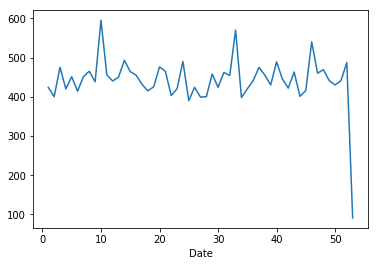

In [33]:
Weekly_dist = Earthquake_by_week['Number_of_earthquakes'].plot(kind = 'line')
Weekly_dist
plt.show()